# The bakery sales dataset has 21293 rows. 
#### It contains four variables: Date, Time, Transaction ID and Item. 

#### Date: 
Categorical variable about the date of the transactions (YYYY-MM-DD format). The column starts from 30/10/2016 to 09/04/2017.

#### Time: 
Categorical variable about the time of the transactions (HH:MM:SS format).

#### Transaction:
Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction. In other words, 1 person has more than 1 item.

#### Item: 
Categorical variable with the products.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/data/BreadBasket_DMS.csv')
df.head(5)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [18]:
df.shape

(21293, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [20]:
df.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [21]:
df['Item'].value_counts().head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

##### There are 786 NONE items, ignore these item and proceed.

In [22]:
df=df[df['Item'] !='NONE']

In [23]:
df['Item'].value_counts().tail(10)

Spread            2
Bowl Nic Pitt     2
Bacon             1
Raw bars          1
Chicken sand      1
Olum & polenta    1
The BART          1
Gift voucher      1
Adjustment        1
Polenta           1
Name: Item, dtype: int64

In [24]:
df=df[df['Item']!='Adjusment']

## Which products are the top 10 best-selling and lowest of all time and each month?

In [28]:
#Add Date_of_month coloumn 
df['Date'] = pd.to_datetime(df['Date'])
df['Date_of_month'] = df['Date'].dt.day

#Add Month coloumn 
df['Month'] = df['Date'].dt.month

#Add Day_name coloumn 
df['Day_name'] = df['Date'].dt.day_name()

In [29]:
df.head()

,Date,Time,Transaction,Item,Date_of_month,Month,Day_name
0,2016-10-30,09:58:11,1,Bread,30,10,Sunday
1,2016-10-30,10:05:34,2,Scandinavian,30,10,Sunday
2,2016-10-30,10:05:34,2,Scandinavian,30,10,Sunday
3,2016-10-30,10:07:57,3,Hot chocolate,30,10,Sunday
4,2016-10-30,10:07:57,3,Jam,30,10,Sunday


In [33]:
#Dictionary to map month
m = {10 : '10 (October)', 11 :'11 (November)', 12 :'12 (Desember)',1:'01 (January)',2:'02 (February)',3:'03 (March)',4:'04 (April)'}
b = df['Month']
df['Month_str'] = b.map(m)

In [34]:
df.head()

,Date,Time,Transaction,Item,Date_of_month,Month,Day_name,Month_str
0,2016-10-30,09:58:11,1,Bread,30,10,Sunday,10 (October)
1,2016-10-30,10:05:34,2,Scandinavian,30,10,Sunday,10 (October)
2,2016-10-30,10:05:34,2,Scandinavian,30,10,Sunday,10 (October)
3,2016-10-30,10:07:57,3,Hot chocolate,30,10,Sunday,10 (October)
4,2016-10-30,10:07:57,3,Jam,30,10,Sunday,10 (October)


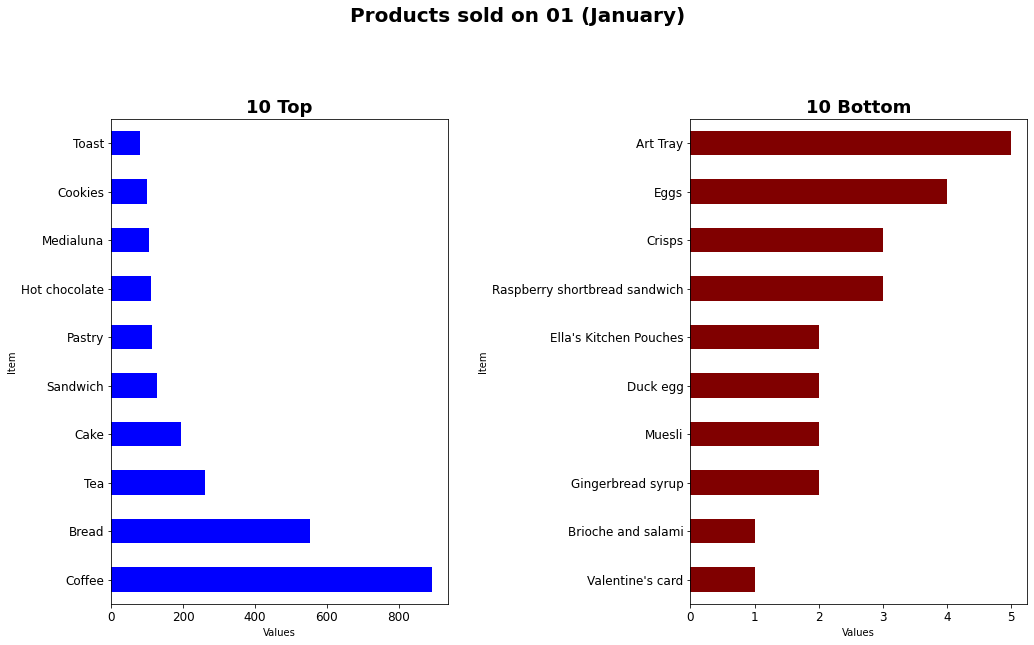

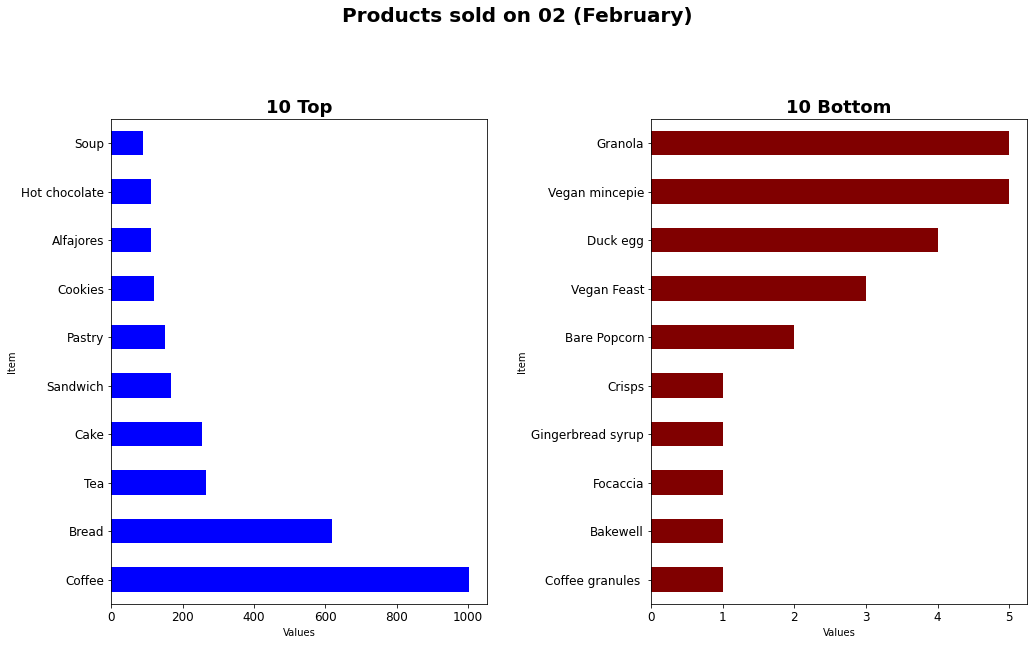

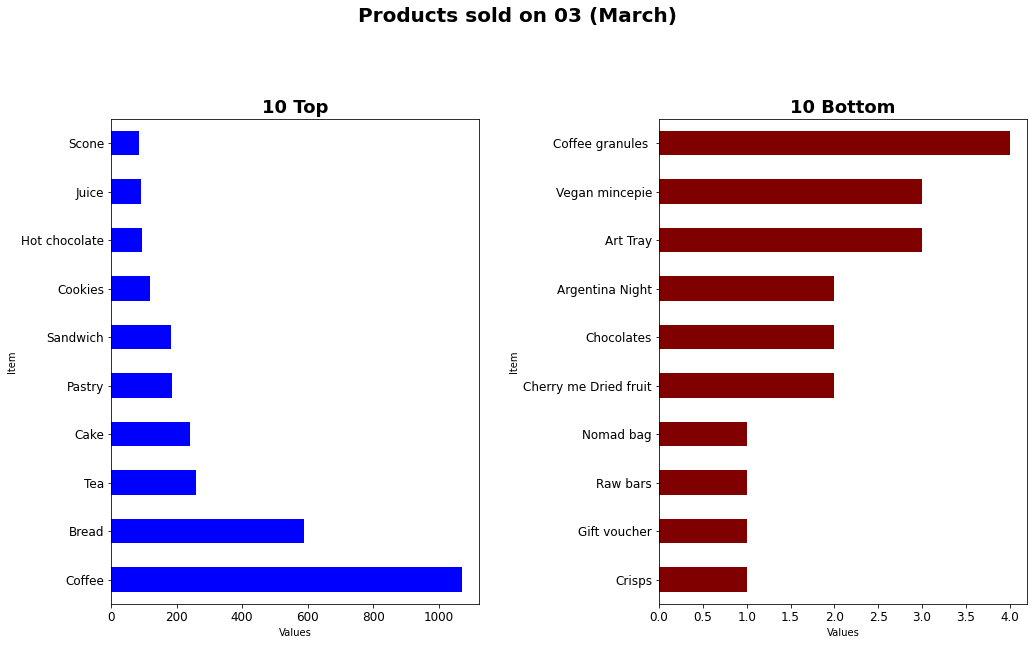

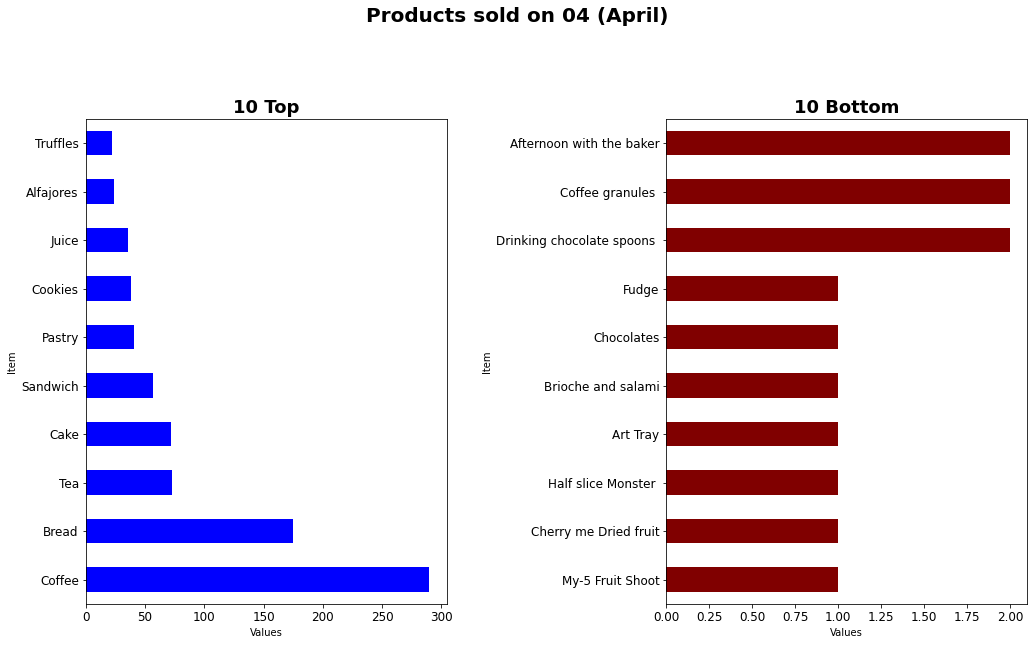

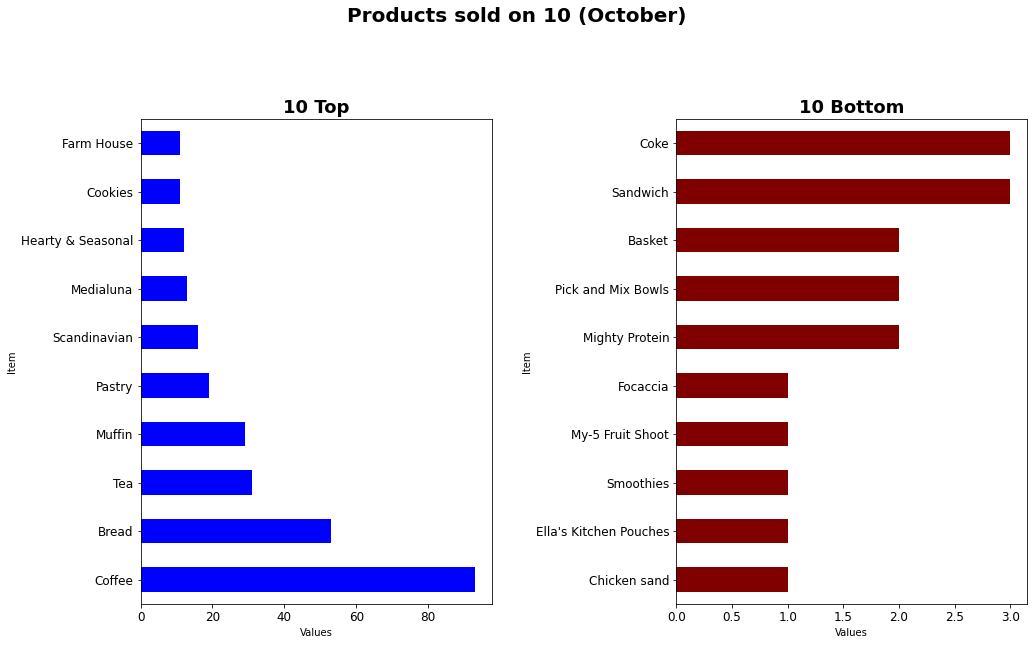

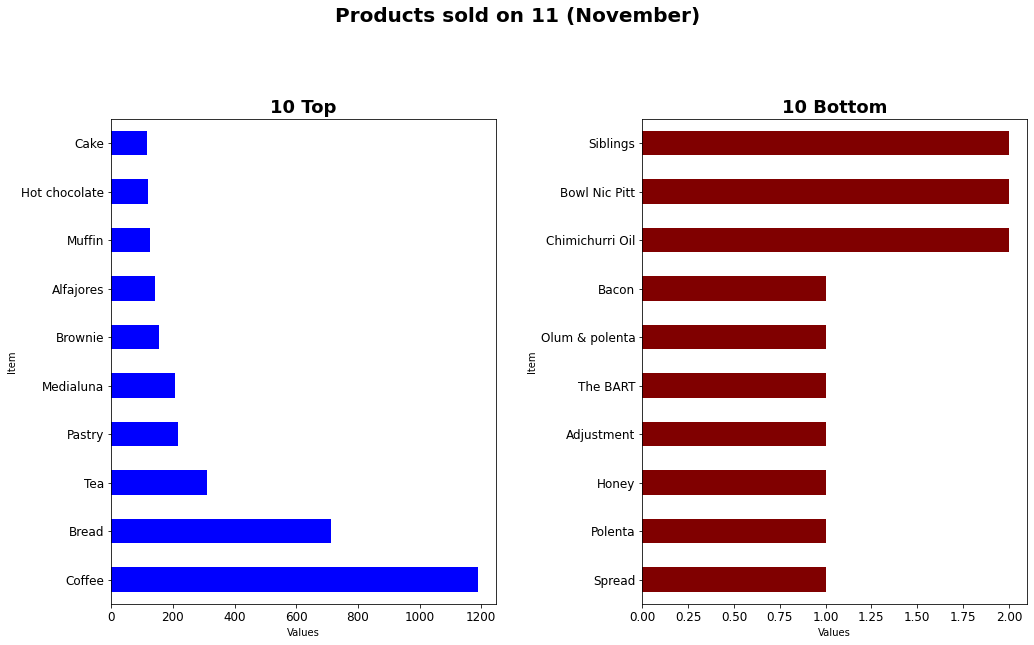

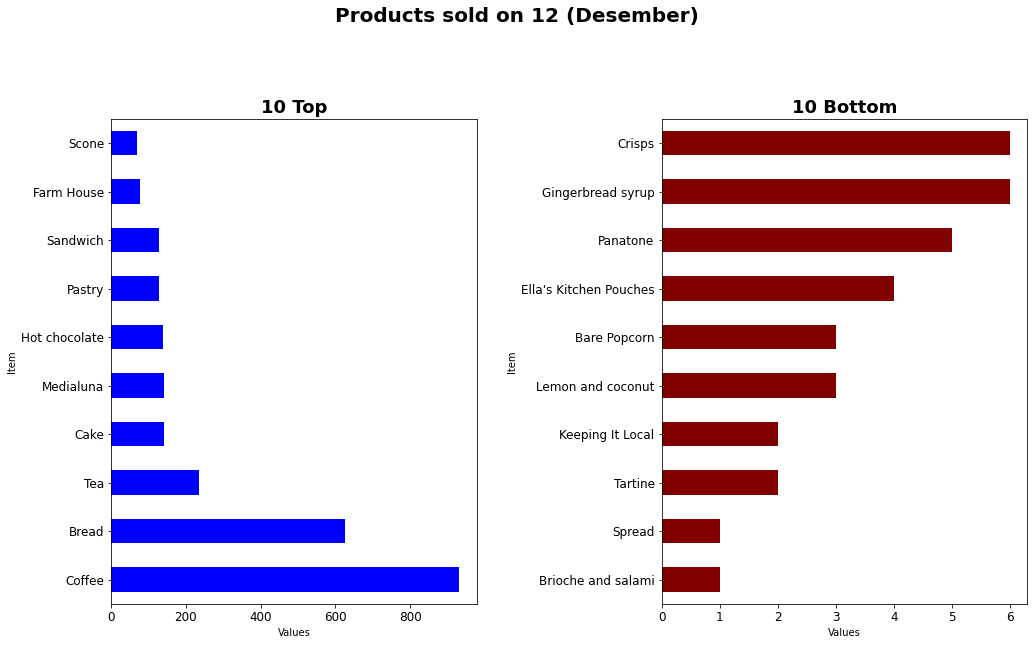

In [39]:
set_month = list(set(df['Month_str']))
sort_month = sorted(set_month)
for i in range (len (sort_month)):
    month=df[df['Month_str']==sort_month[i]]
    fig, ax = plt.subplots(1,2, figsize=(15,9))
    fig.suptitle("Products sold on " + str(sort_month[i]), fontsize=20, fontweight='bold',y=1.02)
    month['Item'].value_counts()[:10].plot(kind='barh',fontsize=12, ax=ax[0],color ='blue')
    month['Item'].value_counts(ascending=True)[:10].plot(kind='barh',fontsize=12, ax=ax[1],color ='maroon')
    ax[0].set_title('10 Top', fontsize=18, fontweight='bold')
    ax[1].set_title('10 Bottom', fontsize=18, fontweight='bold')
    ax[0].set(xlabel="Values", ylabel = "Item")
    ax[1].set(xlabel="Values", ylabel = "Item")
    fig.tight_layout(pad=3, h_pad=3.0)

### Coffee is always the best selling product and followed by Bread and Tea in every month. Preferably for some products in the bottom 10 position which only sold 1 or 2 times, there is no need to sell these products especially if the product has a short expiration date. Or can be sold with a preorder system. 

## How are the sales on each section (morning, afternoon, evening, and night)? 

In [40]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

def section(hour):
    if hour >= 7 and hour<11:
        section = 'Morning'
    elif hour >= 11 and hour<=14:
        section = 'Afternoon'
    elif hour  >= 15 and hour<=18:
        section = 'Evening'
    else:
        section = 'Night'
        
    return section
df['Section'] = df['Hour'].apply(section)
df.sample(3)

,Date,Time,Transaction,Item,Date_of_month,Month,Day_name,Month_str,Hour,Section
3392,2016-11-18,2022-12-27 14:58:40,1608,Alfajores,18,11,Friday,11 (November),14,Afternoon
20321,2017-04-02,2022-12-27 11:03:28,9248,Coffee,2,4,Sunday,04 (April),11,Afternoon
12356,2017-02-03,2022-12-27 11:10:03,5843,Bread,3,2,Friday,02 (February),11,Afternoon


In [53]:
df1 = pd.DataFrame(df['Hour'].value_counts(), columns=['Hour','Transaction']).reset_index()
df1.columns = ['Hour','Transaction','Ignore']
df1.head()

,Hour,Transaction,Ignore
0,11,3102,NaN
1,12,2854,NaN
2,10,2666,NaN
3,14,2640,NaN
4,13,2617,NaN


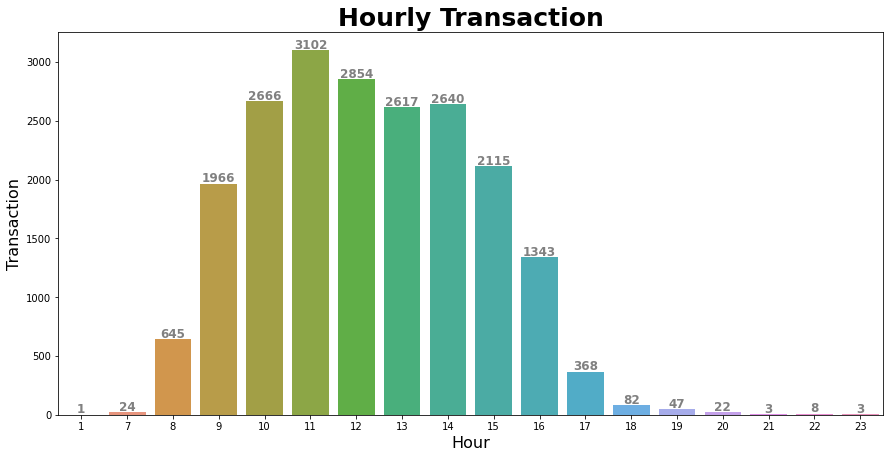

In [58]:
fig, ax = plt.subplots(figsize=(13,7))
g = sns.barplot(x = 'Hour',y='Transaction',data=df1,ax=ax)
x = np.arange(len(df1['Hour']))
y = df1['Transaction']
for i, v in enumerate(y):
    ax.text(x[i], v+15, str(v), fontsize = 12, ha='center', color='gray', fontweight='bold')
ax.set_title('Hourly Transaction', fontsize=25, fontweight='bold')
ax.set_xlabel('Hour', fontsize=16, fontweight='normal')
ax.set_ylabel('Transaction', fontsize=16, fontweight='normal')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

In [62]:
df2

,Section,Transaction,Ignore
0,Afternoon,11213,NaN
1,Morning,5301,NaN
2,Evening,3908,NaN
3,Night,85,NaN


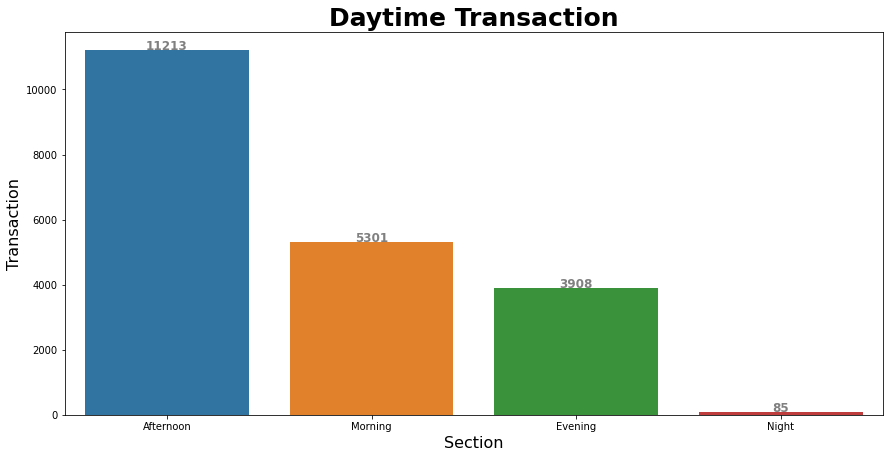

In [63]:
fig, ax = plt.subplots(figsize=(13,7))
g = sns.barplot(x = 'Section',y='Transaction',data=df2,ax=ax)
x = np.arange(len(df2['Section']))
y = df2['Transaction']
for i, v in enumerate(y):
    ax.text(x[i], v+15, str(v), fontsize = 12, ha='center', color='gray', fontweight='bold')
ax.set_title('Daytime Transaction', fontsize=25, fontweight='bold')
ax.set_xlabel('Section', fontsize=16, fontweight='normal')
ax.set_ylabel('Transaction', fontsize=16, fontweight='normal')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

### The most transactions is at 10 a.m — 12 p.m, with a peak at 11 a.m with as many transactions as 3102. So the allocation of employees at lunch time should be more than dinner time. 

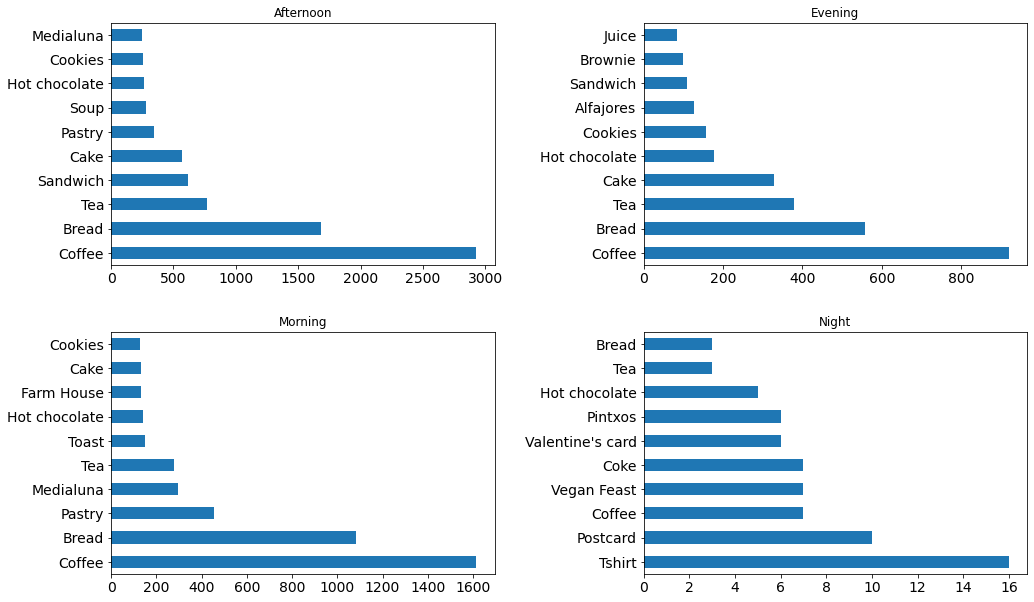

In [64]:
set_section = list(set(df['Section']))
section=df[df['Section']==set_section[0]]
section1=df[df['Section']==set_section[1]]
section2=df[df['Section']==set_section[2]]
section3=df[df['Section']==set_section[3]]
fig, ax = plt.subplots(2,2, figsize=(15,9))
section['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[0,0], title='Afternoon')
section1['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[0,1],title='Evening')
section2['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[1,0],title='Morning')
section3['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[1,1],title='Night')
fig.tight_layout(pad=3.0)

### In the morning to evening session during the sales period, the 2 best-selling items are coffee, and bread. Different things are seen in the night session, the best-selling items are Tshirt and postcard. 

In [65]:
grouped = df.groupby(['Month'])['Section'].value_counts().round(0)
unstack_grouped = grouped.unstack()

In [66]:
unstack_grouped

Section,Afternoon,Evening,Morning,Night
Month,,,,
1,1924.0,620.0,810.0,2.0
2,2188.0,856.0,819.0,43.0
3,2171.0,773.0,1000.0,NaN
4,570.0,256.0,321.0,10.0
10,232.0,12.0,125.0,NaN
11,2280.0,857.0,1293.0,6.0
12,1848.0,534.0,933.0,24.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


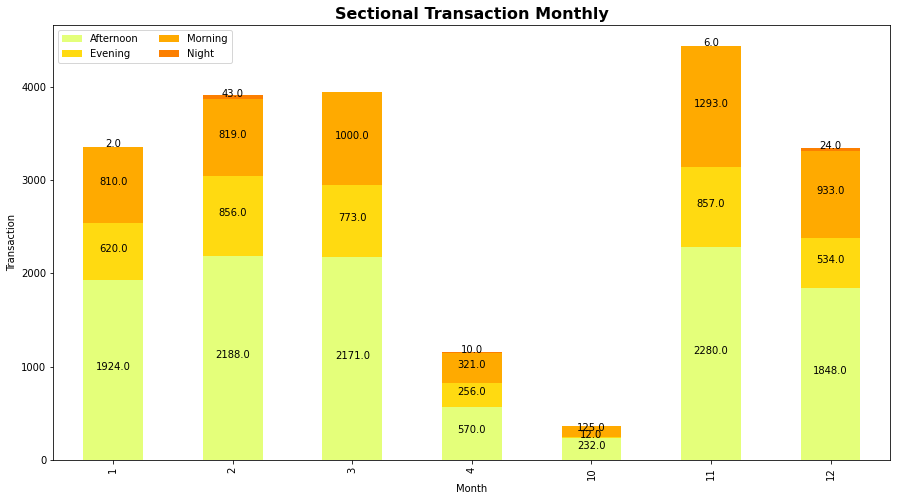

In [67]:
unstack_grouped.plot(kind='bar',
                     stacked=True,
                     colormap='Wistia',
                     figsize=(15,8))

plt.legend(loc="upper left", ncol=2)
plt.ylabel("Transaction")
plt.xlabel("Month")
plt.title("Sectional Transaction Monthly", fontsize=16,
                 fontweight="bold")

for n, x in enumerate([*unstack_grouped.index.values]):
    for (Transaction, count, y_loc) in zip(unstack_grouped.loc[x],
                                          unstack_grouped.loc[x],
                                          unstack_grouped.loc[x].cumsum()):
                
        plt.text(x=n,
                 y=(y_loc - Transaction) + (Transaction / 2),
                 s=f'{count}', 
                 color="black",
                 ha='center',
                 fontsize=10,
                 fontweight="light")


plt.show()

### In the stacked barplot above we can see transactions at night at most in February. This is why tshirt and followed by postcards are the best-selling items in the evening session, certainly related to Valentine’s Day. Besides that, we can see that the highest sales are in November because it is nearing Christmas and New Years. 

## How was the daily sales

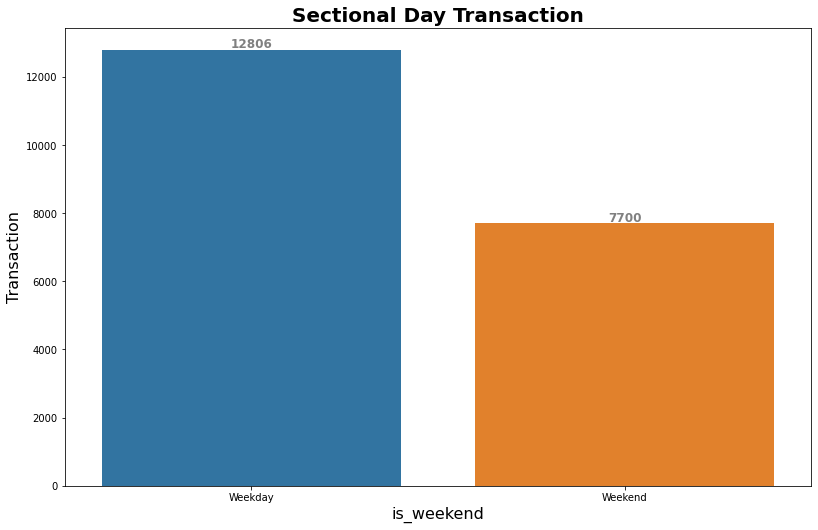

In [70]:
df['is_weekend'] = df['Day_name'].apply(lambda x: 'Weekend' if (x == 'Saturday' or x == 'Sunday') else 'Weekday')
df.sample(3)
df3 = pd.DataFrame({'is_weekend':['Weekday','Weekend'],
                    'Transaction' : [12806,7700]})
#Visualize
fig, ax = plt.subplots(figsize=(12,8))
g = sns.barplot(x = 'is_weekend',y='Transaction',data=df3,ax=ax)
x = np.arange(len(df['is_weekend']))
y = df3['Transaction']
for i, v in enumerate(y):
    ax.text(x[i], v+50, str(v), fontsize = 12, ha='center', color='gray', fontweight='bold')
ax.set_title('Sectional Day Transaction', fontsize=20, fontweight='bold')
ax.set_xlabel('is_weekend', fontsize=16, fontweight='normal')
ax.set_ylabel('Transaction', fontsize=16, fontweight='normal')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

<AxesSubplot:ylabel='Day_name'>

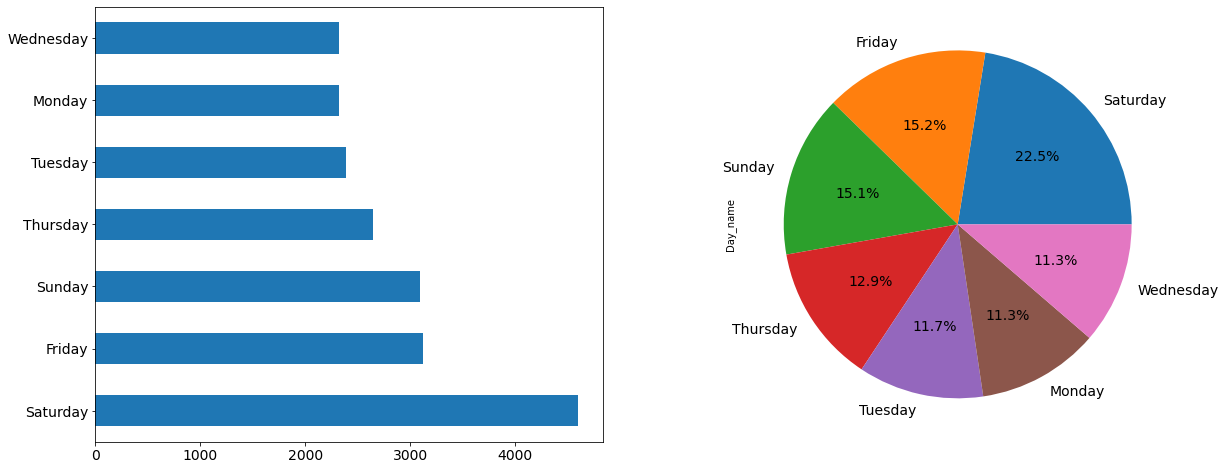

In [71]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
df['Day_name'].value_counts().plot(kind='barh',fontsize=14, ax=ax[0])
df['Day_name'].value_counts().plot(kind='pie',fontsize=14,autopct="%1.1f%%", ax=ax[1])

### Saturday is the day of the most transactions, followed by Friday (one day before weekend) and Sunday. from here we can know that most of customers visit the bakery for holiday or hang out with their family or friends.  

posx and posy should be finite values
posx and posy should be finite values


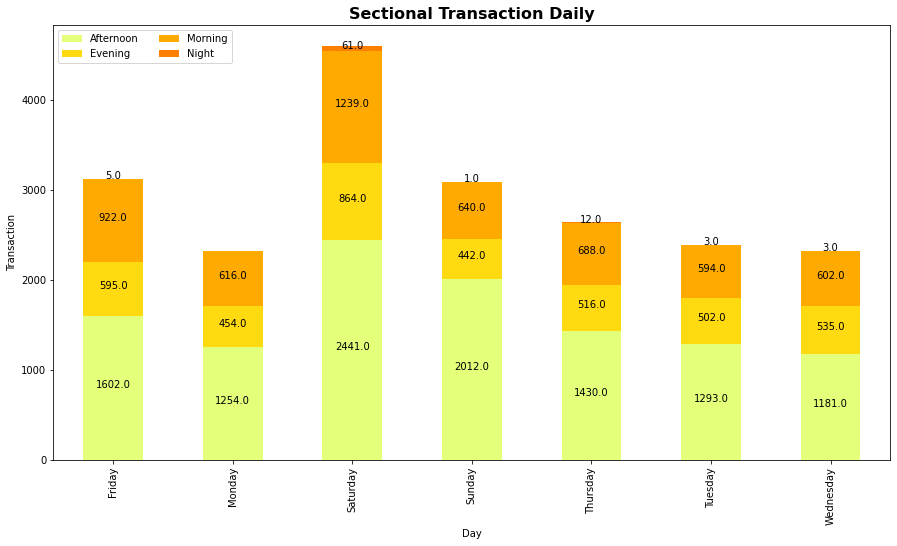

In [72]:
grouped1 = df.groupby(['Day_name'])['Section'].value_counts().round(0)
unstack_grouped1 = grouped1.unstack()
unstack_grouped1
unstack_grouped1.plot(kind='bar',
                     stacked=True,
                     colormap='Wistia',
                     figsize=(15,8))
plt.legend(loc="upper left", ncol=2)
plt.ylabel("Transaction")
plt.xlabel("Day")
plt.title("Sectional Transaction Daily", fontsize=16,
                 fontweight="bold")
for n, x in enumerate([*unstack_grouped1.index.values]):
    for (Transaction, count, y_loc) in zip(unstack_grouped1.loc[x],
                                          unstack_grouped1.loc[x],
                                          unstack_grouped1.loc[x].cumsum()):
                
        plt.text(x=n,
                 y=(y_loc - Transaction) + (Transaction / 2),
                 s=f'{count}', 
                 color="black",
                 ha='center',
                 fontsize=10,
                 fontweight="light")
plt.show()

### Transactions on Saturdays are mostly during the afternoon, this means that visitors are enjoying a holiday with family or friends over lunch.

# Conclusion

## The best-selling items are Coffee, bread, and tea throughout sales. But not in February. This is because it has to do with Valentine’s Day.

## Transactions throughout the most crowded sales occur on Saturdays, especially in the early hours of the day.

## Transactions during the most crowded sales occurred in November.

## Preferably for some products in the bottom 10 position which only sold once or twice, there is no need to sell these products especially if the product has a short expiration date. Or can be sold with a preorder system.

## Lunchtime is the busiest time of the year, peaking at 11 a.m. So if bakery employees work in shifts, the allocation of employees at lunch time should be more than dinner time.